* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


## 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 시각화를 위한 폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

In [2]:
# 한글폰트 사용을 위해 설치
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.7 MB/s eta 0:00:00


In [3]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

* 그래프의 다양한 style 설정 : https://matplotlib.org/stable/tutorials/introductory/customizing.html

<Axes: title={'center': '한글'}>

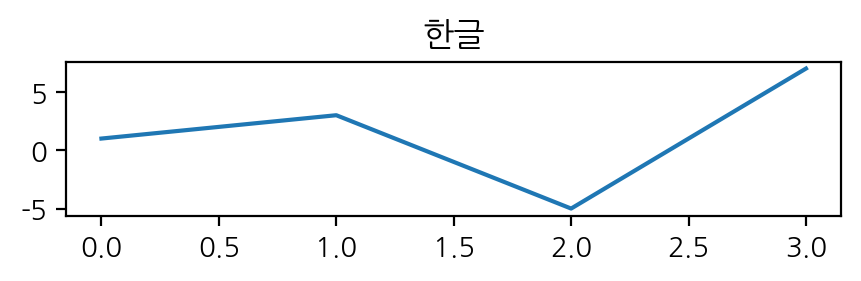

In [4]:
# 한글폰트 확인
pd.Series([1, 3, -5, 7]).plot(title="한글", figsize=(5, 1))

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [5]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
!pip install -U finance-datareader

In [6]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr

fdr.__version__

'0.9.70'

## 상장종목 목록 가져오기

* 다음의 형태가 되도록 만들어 주세요.

|    | 종목별           |
|---:|:-----------------|
|  1 | 삼성전자         |
|  2 | LG에너지솔루션   |
|  3 | SK하이닉스       |
|  4 | 삼성바이오로직스 |
|  5 | NAVER            |
|  6 | 삼성SDI          |
|  7 | 현대차           |
|  8 | LG화학           |
|  9 | 카카오           |
| 10 | 기아             |

In [7]:
url = "https://finance.naver.com/sise/entryJongmok.naver?&page=1"

print(url)

https://finance.naver.com/sise/entryJongmok.naver?&page=1


In [8]:
# 해당 URL 로 상위 10개 종목 불러오기
df_top10 = pd.read_html(url)[0].dropna()
df_top10

,종목별,현재가,전일비,등락률,거래량,거래대금(백만),시가총액(억)
1,삼성전자,73800.0,200.0,-0.27%,5639522.0,418922.0,4405700.0
2,SK하이닉스,138100.0,3400.0,-2.40%,2605933.0,366150.0,1005371.0
3,LG에너지솔루션,365000.0,15500.0,-4.07%,163108.0,59712.0,854100.0
4,삼성바이오로직스,791000.0,3000.0,+0.38%,52141.0,41374.0,562986.0
5,현대차,188700.0,3700.0,+2.00%,370491.0,69355.0,399160.0
6,셀트리온,182500.0,1800.0,+1.00%,253549.0,46218.0,397815.0
7,기아,91800.0,3900.0,+4.44%,1910907.0,172189.0,369077.0
8,NAVER,213000.0,5000.0,-2.29%,311551.0,66697.0,345930.0
9,POSCO홀딩스,390000.0,10000.0,-2.50%,425035.0,165786.0,329828.0
10,LG화학,395000.0,5500.0,-1.37%,84658.0,33494.0,278840.0


## 전체 상장종목에서 종목코드와 종목명만 가져오기

* 아래의 형태가 되게 해주세요.

| Name             |   Symbol |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |

In [9]:
# KRX
df_krx = fdr.StockListing("KRX")[["Name", "Code"]]
df_krx.shape

(2787, 2)

In [10]:
# 종목명, 코드만 가져오기
df_krx.head()

,Name,Code
0,삼성전자,005930
1,SK하이닉스,000660
2,LG에너지솔루션,373220
3,삼성바이오로직스,207940
4,삼성전자우,005935


## merge 를 통한 시가총액 상위 10개 종목 만들기

### merge
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>



* 아래의 형태가 되게 만들며, Name을 인덱스로 지정합니다.

| Name             |   Code |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |
| 삼성SDI          |   006400 |
| 현대차           |   005380 |
| LG화학           |   051910 |
| 카카오           |   035720 |
| 기아             |   000270 |

In [11]:
df_krx[df_krx["Name"].isin(df_top10["종목별"])]

,Name,Code
0,삼성전자,005930
1,SK하이닉스,000660
2,LG에너지솔루션,373220
3,삼성바이오로직스,207940
5,현대차,005380
6,셀트리온,068270
7,기아,000270
8,NAVER,035420
9,POSCO홀딩스,005490
10,LG화학,051910


In [12]:
# 일별 시세를 수집하기 위해 종목코드가 필요하기 때문에 종목코드를 찾습니다.
# 도움말 : (shift+tab+tab)
df_10 = df_top10.merge(df_krx, left_on="종목별", right_on="Name")[["Name", "Code"]]
df_10

,Name,Code
0,삼성전자,005930
1,SK하이닉스,000660
2,LG에너지솔루션,373220
3,삼성바이오로직스,207940
4,현대차,005380
5,셀트리온,068270
6,기아,000270
7,NAVER,035420
8,POSCO홀딩스,005490
9,LG화학,051910


In [13]:
# 일별시세 수집
# OHLCVC
fdr.DataReader("005930", start="2022")["Close"]

Date
2022-01-03    78600
2022-01-04    78700
2022-01-05    77400
2022-01-06    76900
2022-01-07    78300
              ...  
2024-01-19    74700
2024-01-22    75100
2024-01-23    75200
2024-01-24    74000
2024-01-25    74000
Name: Close, Length: 509, dtype: int64

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [14]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = [fdr.DataReader(code, start="2022")["Close"] for code in df_10["Code"]]

In [15]:
# item_list 안에 시가총액 순위 별로 종가가 들어있습니다.
item_list

[Date
 2022-01-03    78600
 2022-01-04    78700
 2022-01-05    77400
 2022-01-06    76900
 2022-01-07    78300
               ...  
 2024-01-19    74700
 2024-01-22    75100
 2024-01-23    75200
 2024-01-24    74000
 2024-01-25    74000
 Name: Close, Length: 509, dtype: int64,
 Date
 2022-01-03    128500
 2022-01-04    128500
 2022-01-05    125500
 2022-01-06    125000
 2022-01-07    127000
                ...  
 2024-01-19    141300
 2024-01-22    142600
 2024-01-23    140800
 2024-01-24    141500
 2024-01-25    138600
 Name: Close, Length: 509, dtype: int64,
 Date
 2022-01-27    505000
 2022-01-28    450000
 2022-02-03    477000
 2022-02-04    504000
 2022-02-07    548000
                ...  
 2024-01-19    383500
 2024-01-22    372000
 2024-01-23    373500
 2024-01-24    380500
 2024-01-25    366500
 Name: Close, Length: 491, dtype: int64,
 Date
 2022-01-03    900338
 2022-01-04    877607
 2022-01-05    850923
 2022-01-06    828192
 2022-01-07    834122
                ...  
 2024-

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [16]:
df_10["Name"]

0        삼성전자
1      SK하이닉스
2    LG에너지솔루션
3    삼성바이오로직스
4         현대차
5        셀트리온
6          기아
7       NAVER
8    POSCO홀딩스
9        LG화학
Name: Name, dtype: object

In [17]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.

df = pd.concat(item_list, axis=1)
df.columns = df_10["Name"]
df

Name,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,NAVER,POSCO홀딩스,LG화학
Date,,,,,,,,,,
2022-01-03,78600,128500,NaN,900338,210500,191210,82600,376000,280000,618000
2022-01-04,78700,128500,NaN,877607,210000,187357,83500,365500,286500,644000
2022-01-05,77400,125500,NaN,850923,213500,180614,85900,355000,295500,664000
2022-01-06,76900,125000,NaN,828192,214000,174353,85600,338500,304500,690000
2022-01-07,78300,127000,NaN,834122,215000,175798,86700,338000,305000,719000
...,...,...,...,...,...,...,...,...,...,...
2024-01-19,74700,141300,383500.0,770000,181700,176000,87600,215500,414500,404500
2024-01-22,75100,142600,372000.0,793000,180100,183600,87200,217000,398500,387000
2024-01-23,75200,140800,373500.0,799000,184800,181600,87900,218000,403000,391000


## 여러 종목 한번에 시각화 하기

<Axes: xlabel='Date'>

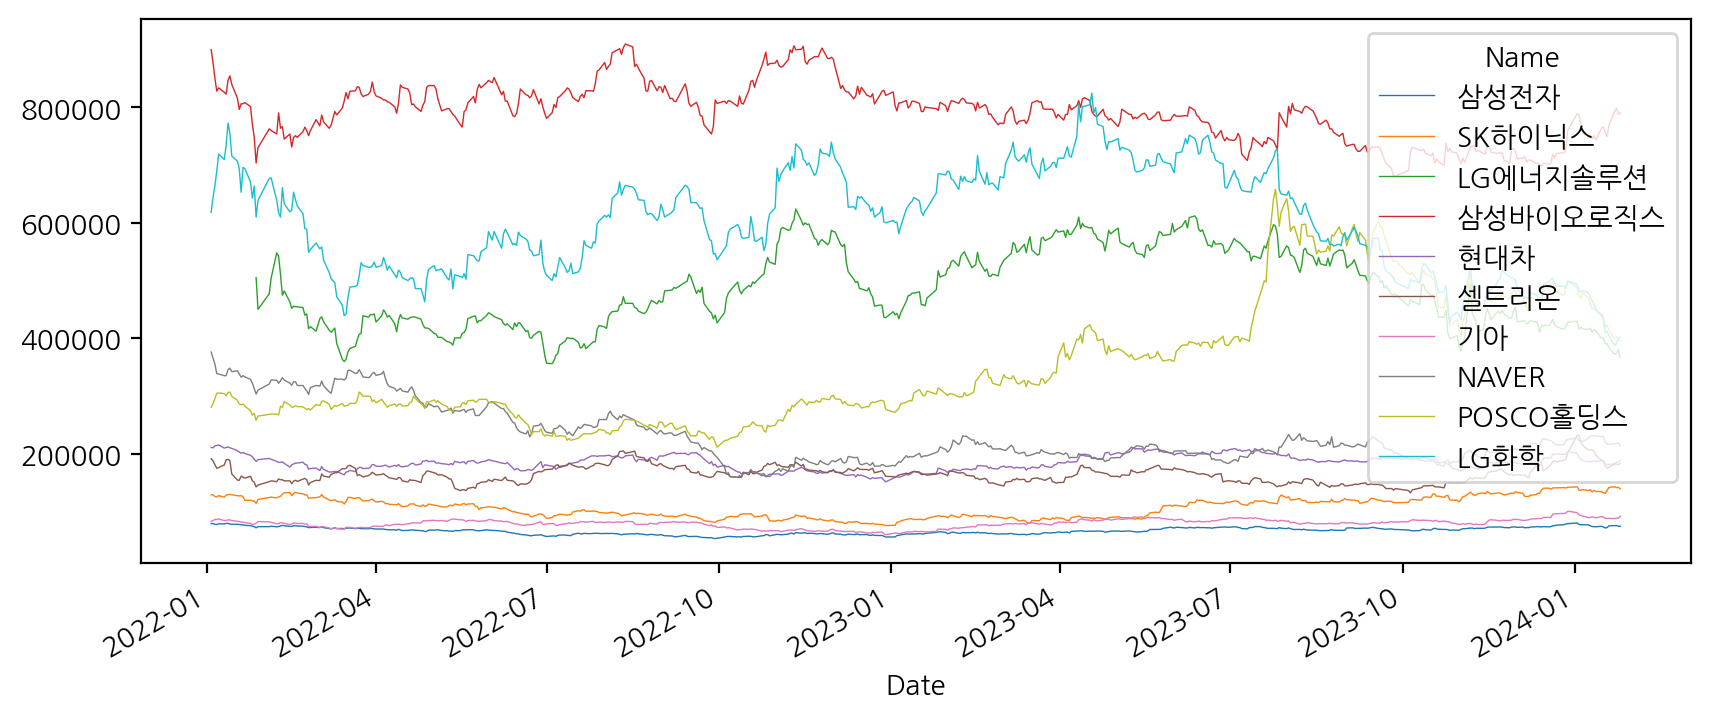

In [18]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot(figsize=(10, 4), lw=0.5)


<Axes: xlabel='Date'>

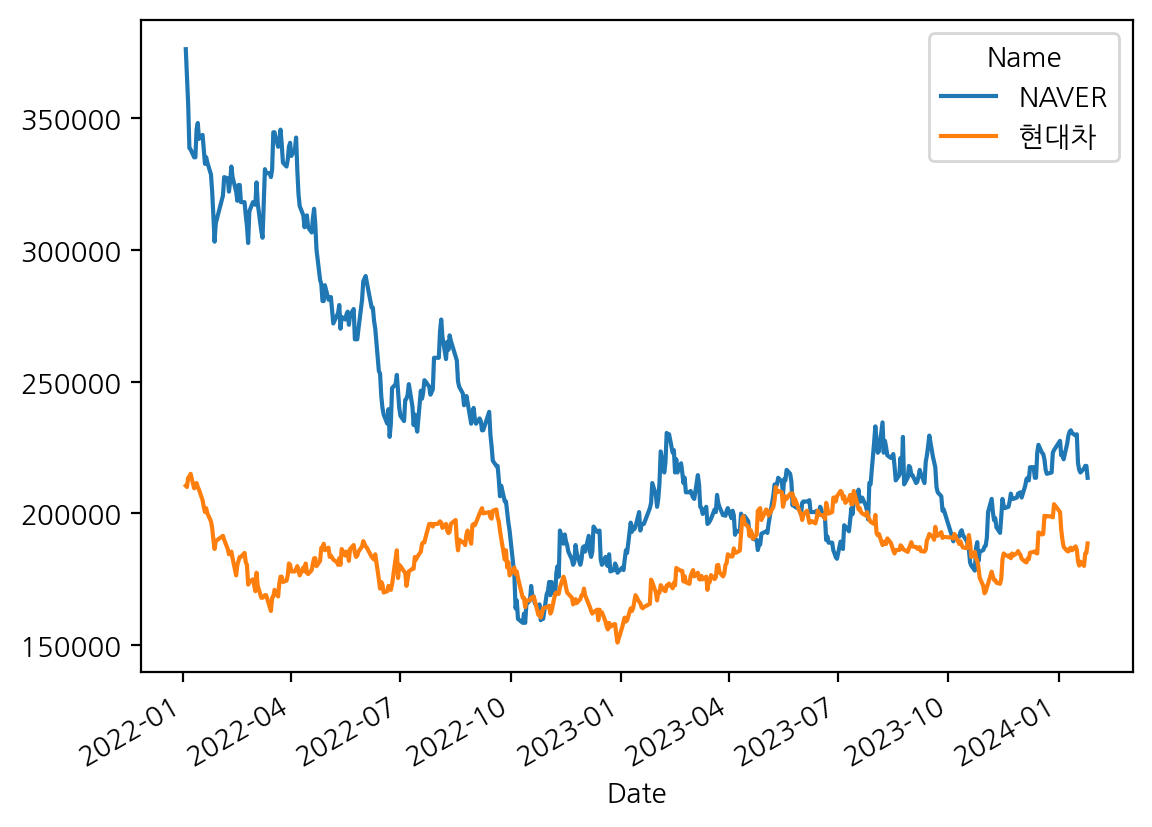

In [24]:
# 2개의 종목 비교하기

df[['NAVER','현대차']].plot()

In [78]:
#plotly로 더 제대로 주식가격 표현하기!

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(y=df["삼성전자"], name="삼성전자"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(y=df["삼성바이오로직스"], name="바이오로직스"),
    secondary_y=True,
)

## 2축 그래프 사용하기

<Axes: xlabel='Date'>

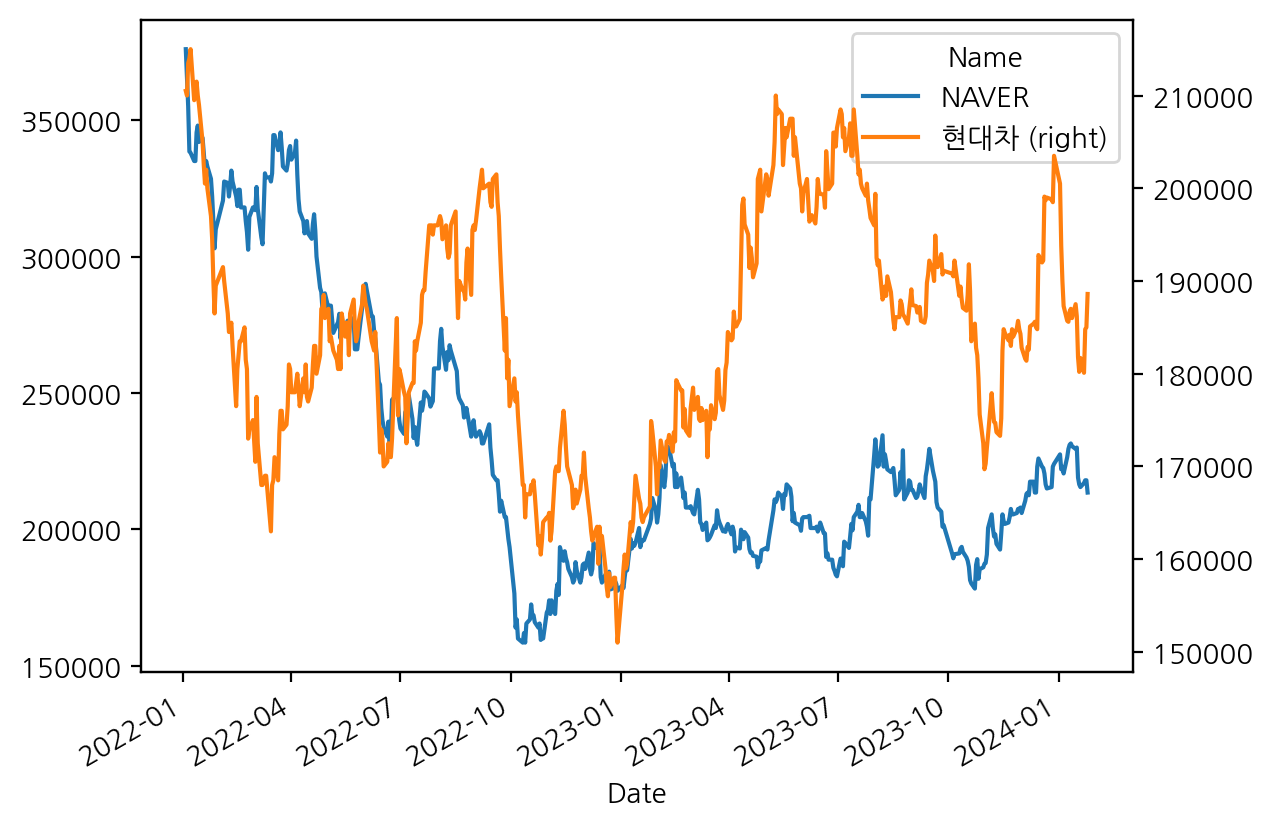

In [28]:
# secondary_y를 사용해 2축 그래프 그리기


df[['NAVER','현대차']].plot(secondary_y = '현대차')

In [29]:
df.describe()

Name,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,NAVER,POSCO홀딩스,LG화학
count,509.000000,509.000000,491.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.00000
mean,66008.251473,106316.502947,485558.044807,792046.919450,184207.858546,164029.096267,78771.709234,229932.220039,351629.666012,603244.59725
std,6071.095412,17641.005681,67332.689028,48679.892753,13017.209125,15158.997327,7458.015375,48611.911059,106555.223401,92121.20031
min,52600.000000,75000.000000,356000.000000,680000.000000,151000.000000,131800.000000,59300.000000,158500.000000,211000.000000,387000.00000
25%,60800.000000,90200.000000,429750.000000,757000.000000,174700.000000,152600.000000,75300.000000,196000.000000,280000.000000,520000.00000
50%,66500.000000,108500.000000,477000.000000,794000.000000,184800.000000,163275.000000,79800.000000,213500.000000,301000.000000,610000.00000
75%,71000.000000,120000.000000,548500.000000,821000.000000,193500.000000,172908.000000,83900.000000,249000.000000,416000.000000,683000.00000
max,79600.000000,142600.000000,624000.000000,910000.000000,215000.000000,231500.000000,100000.000000,376000.000000,658000.000000,825000.00000


In [30]:
corr = df.corr(method = 'pearson')

In [31]:
corr

Name,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,NAVER,POSCO홀딩스,LG화학
Name,,,,,,,,,,
삼성전자,1.000000,0.884879,-0.059733,-0.511467,0.481088,-0.065963,0.580015,0.409589,0.538424,-0.193434
SK하이닉스,0.884879,1.000000,-0.353497,-0.572722,0.377919,-0.071834,0.566561,0.397505,0.543172,-0.531317
LG에너지솔루션,-0.059733,-0.353497,1.000000,0.104517,0.219827,-0.153781,-0.064359,-0.497228,0.244170,0.858239
삼성바이오로직스,-0.511467,-0.572722,0.104517,1.000000,-0.253662,0.447682,-0.472845,0.144763,-0.664415,0.343567
현대차,0.481088,0.377919,0.219827,-0.253662,1.000000,0.064397,0.830959,0.177090,0.327761,0.228145
셀트리온,-0.065963,-0.071834,-0.153781,0.447682,0.064397,1.000000,0.059282,0.017377,-0.299078,0.015010
기아,0.580015,0.566561,-0.064359,-0.472845,0.830959,0.059282,1.000000,0.141972,0.434661,-0.124608
NAVER,0.409589,0.397505,-0.497228,0.144763,0.177090,0.017377,0.141972,1.000000,-0.290134,-0.220500
POSCO홀딩스,0.538424,0.543172,0.244170,-0.664415,0.327761,-0.299078,0.434661,-0.290134,1.000000,-0.129114


In [89]:
import seaborn as sns

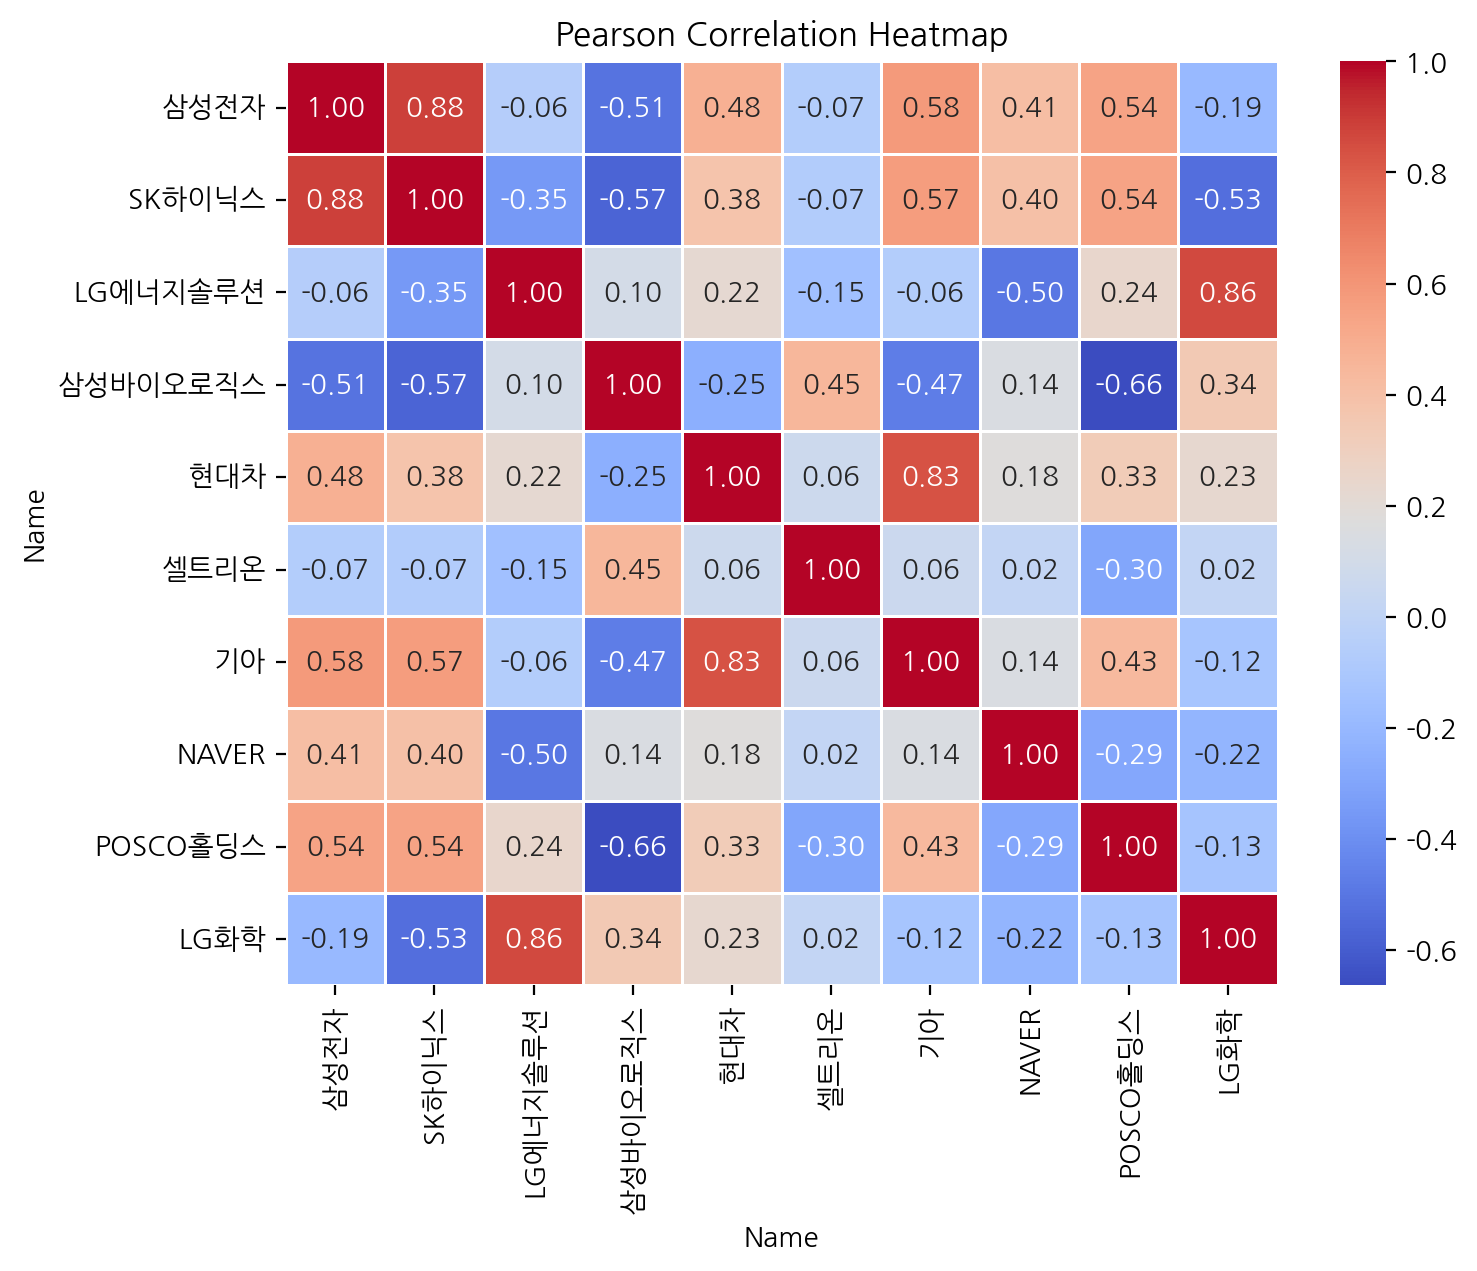

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) :
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) :
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [38]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = (df / df.iloc[0]) -1
df_norm

Name,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,NAVER,POSCO홀딩스,LG화학
Date,,,,,,,,,,
2022-01-03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-04,0.001272,0.000000,NaN,-0.025247,-0.002375,-0.020151,0.010896,-0.027926,0.023214,0.042071
2022-01-05,-0.015267,-0.023346,NaN,-0.054885,0.014252,-0.055416,0.039952,-0.055851,0.055357,0.074434
2022-01-06,-0.021628,-0.027237,NaN,-0.080132,0.016627,-0.088160,0.036320,-0.099734,0.087500,0.116505
2022-01-07,-0.003817,-0.011673,NaN,-0.073546,0.021378,-0.080602,0.049637,-0.101064,0.089286,0.163430
...,...,...,...,...,...,...,...,...,...,...
2024-01-19,-0.049618,0.099611,NaN,-0.144766,-0.136817,-0.079546,0.060533,-0.426862,0.480357,-0.345469
2024-01-22,-0.044529,0.109728,NaN,-0.119220,-0.144418,-0.039799,0.055690,-0.422872,0.423214,-0.373786
2024-01-23,-0.043257,0.095720,NaN,-0.112556,-0.122090,-0.050259,0.064165,-0.420213,0.439286,-0.367314


In [53]:
#LG 에너지솔루션을 상장일 기준 수익률로 구해주세요.
#상장일 : 1/27일 #dropna를 사용해서 상장일 첫 거래가를 구할 수 있다

df_norm['LG에너지솔루션'] = (df['LG에너지솔루션'] / df['LG에너지솔루션'].dropna().iloc[0]) -1
df_norm

Name,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,NAVER,POSCO홀딩스,LG화학
Date,,,,,,,,,,
2022-01-03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-04,0.001272,0.000000,NaN,-0.025247,-0.002375,-0.020151,0.010896,-0.027926,0.023214,0.042071
2022-01-05,-0.015267,-0.023346,NaN,-0.054885,0.014252,-0.055416,0.039952,-0.055851,0.055357,0.074434
2022-01-06,-0.021628,-0.027237,NaN,-0.080132,0.016627,-0.088160,0.036320,-0.099734,0.087500,0.116505
2022-01-07,-0.003817,-0.011673,NaN,-0.073546,0.021378,-0.080602,0.049637,-0.101064,0.089286,0.163430
...,...,...,...,...,...,...,...,...,...,...
2024-01-19,-0.049618,0.099611,-0.240594,-0.144766,-0.136817,-0.079546,0.060533,-0.426862,0.480357,-0.345469
2024-01-22,-0.044529,0.109728,-0.263366,-0.119220,-0.144418,-0.039799,0.055690,-0.422872,0.423214,-0.373786
2024-01-23,-0.043257,0.095720,-0.260396,-0.112556,-0.122090,-0.050259,0.064165,-0.420213,0.439286,-0.367314


### 전체 종목의 수익률 시각화

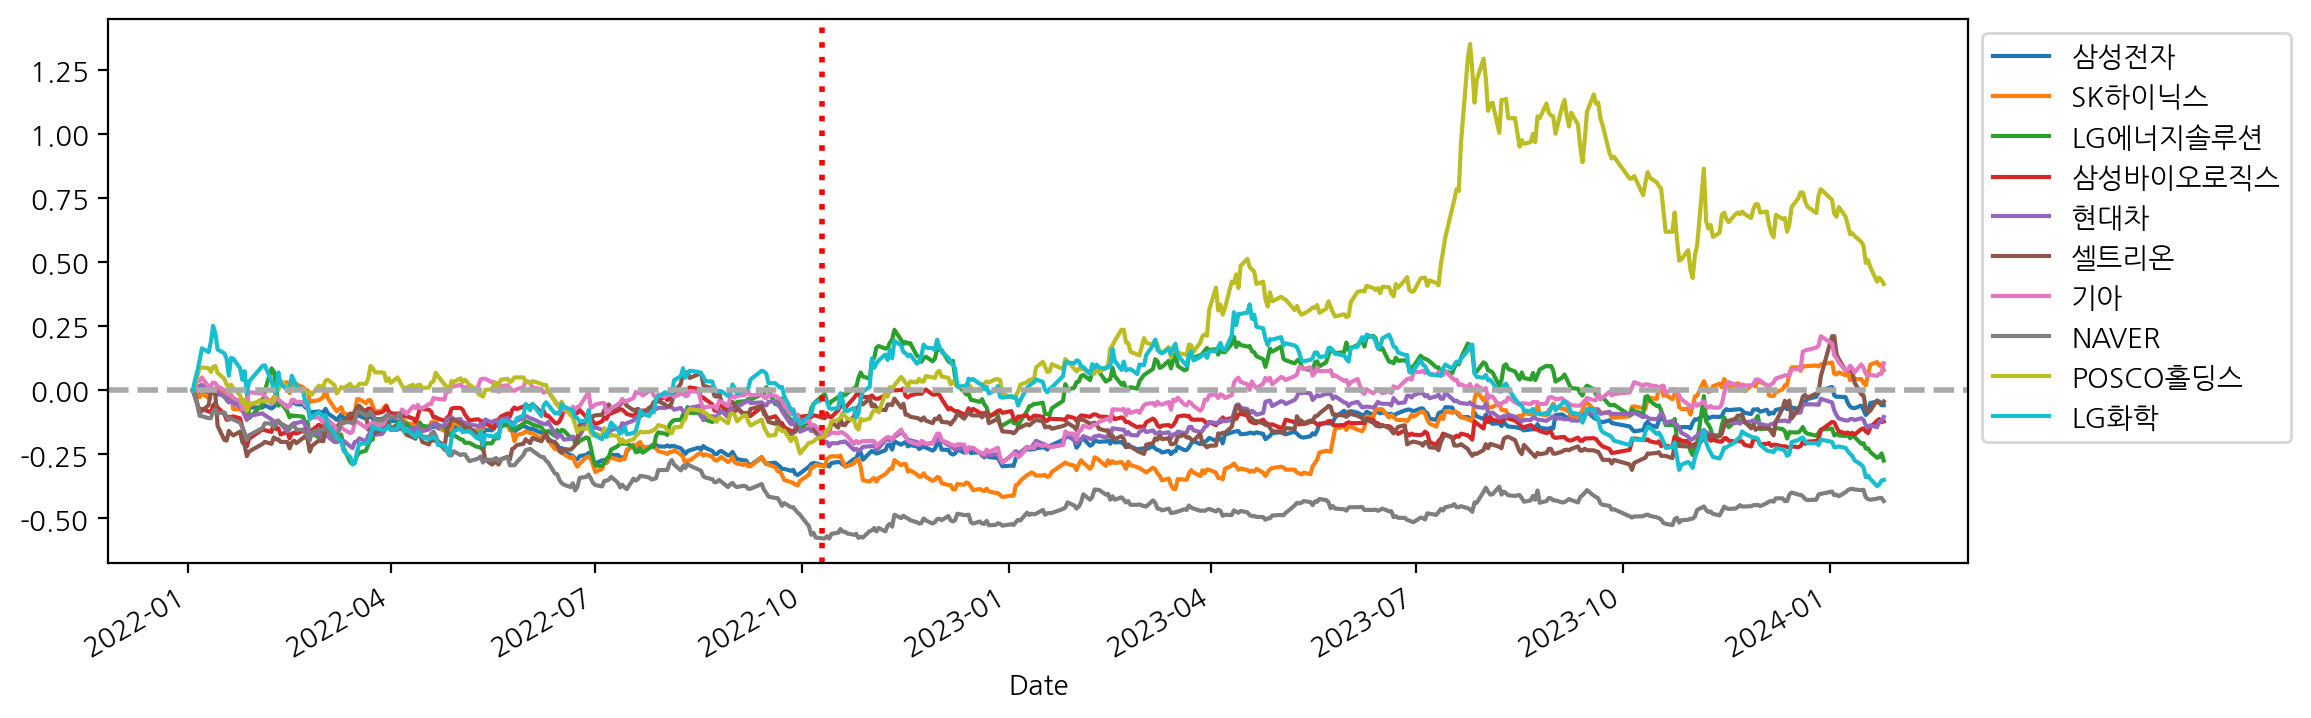

In [75]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot(figsize=(12,4))
plt.axhline(0, c='darkgray', ls='--', lw=2)
plt.axvline('2022-10-10',  c='r', ls=':', lw=2)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

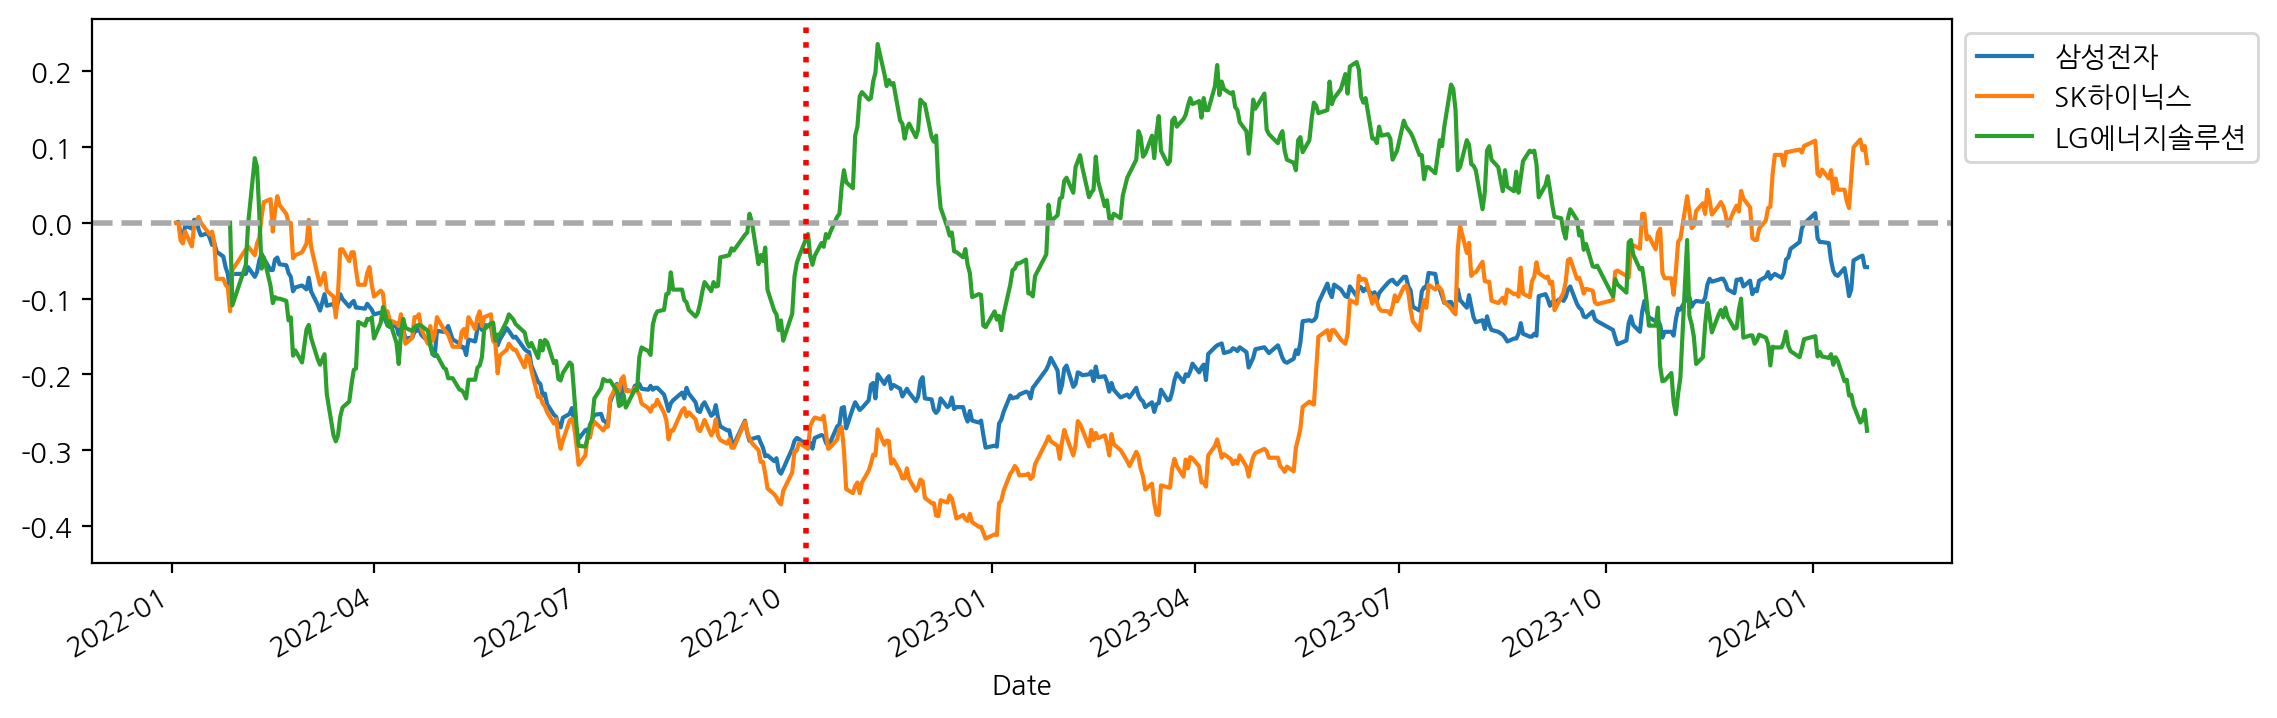

In [76]:
# 시가총액 상위 3개 종목만 시각화
df_norm.iloc[:, :3].plot(figsize=(12,4))
plt.axhline(0, c='darkgray', ls='--', lw=2)
plt.axvline('2022-10-10',  c='r', ls=':', lw=2)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [77]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

Name,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,NAVER,POSCO홀딩스,LG화학
count,509.000000,509.000000,491.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,-0.160200,-0.172634,-0.038499,-0.120278,-0.124903,-0.142152,-0.046347,-0.388478,0.255820,-0.023876
std,0.077240,0.137284,0.133332,0.054068,0.061839,0.079279,0.090291,0.129287,0.380554,0.149063
min,-0.330789,-0.416342,-0.295050,-0.244728,-0.282660,-0.310706,-0.282082,-0.578457,-0.246429,-0.373786
25%,-0.226463,-0.298054,-0.149010,-0.159205,-0.170071,-0.201925,-0.088378,-0.478723,0.000000,-0.158576
50%,-0.153944,-0.155642,-0.055446,-0.118109,-0.122090,-0.146096,-0.033898,-0.432181,0.075000,-0.012945
75%,-0.096692,-0.066148,0.086139,-0.088120,-0.080760,-0.095717,0.015738,-0.337766,0.485714,0.105178
max,0.012723,0.109728,0.235644,0.010732,0.021378,0.210711,0.210654,0.000000,1.350000,0.334951


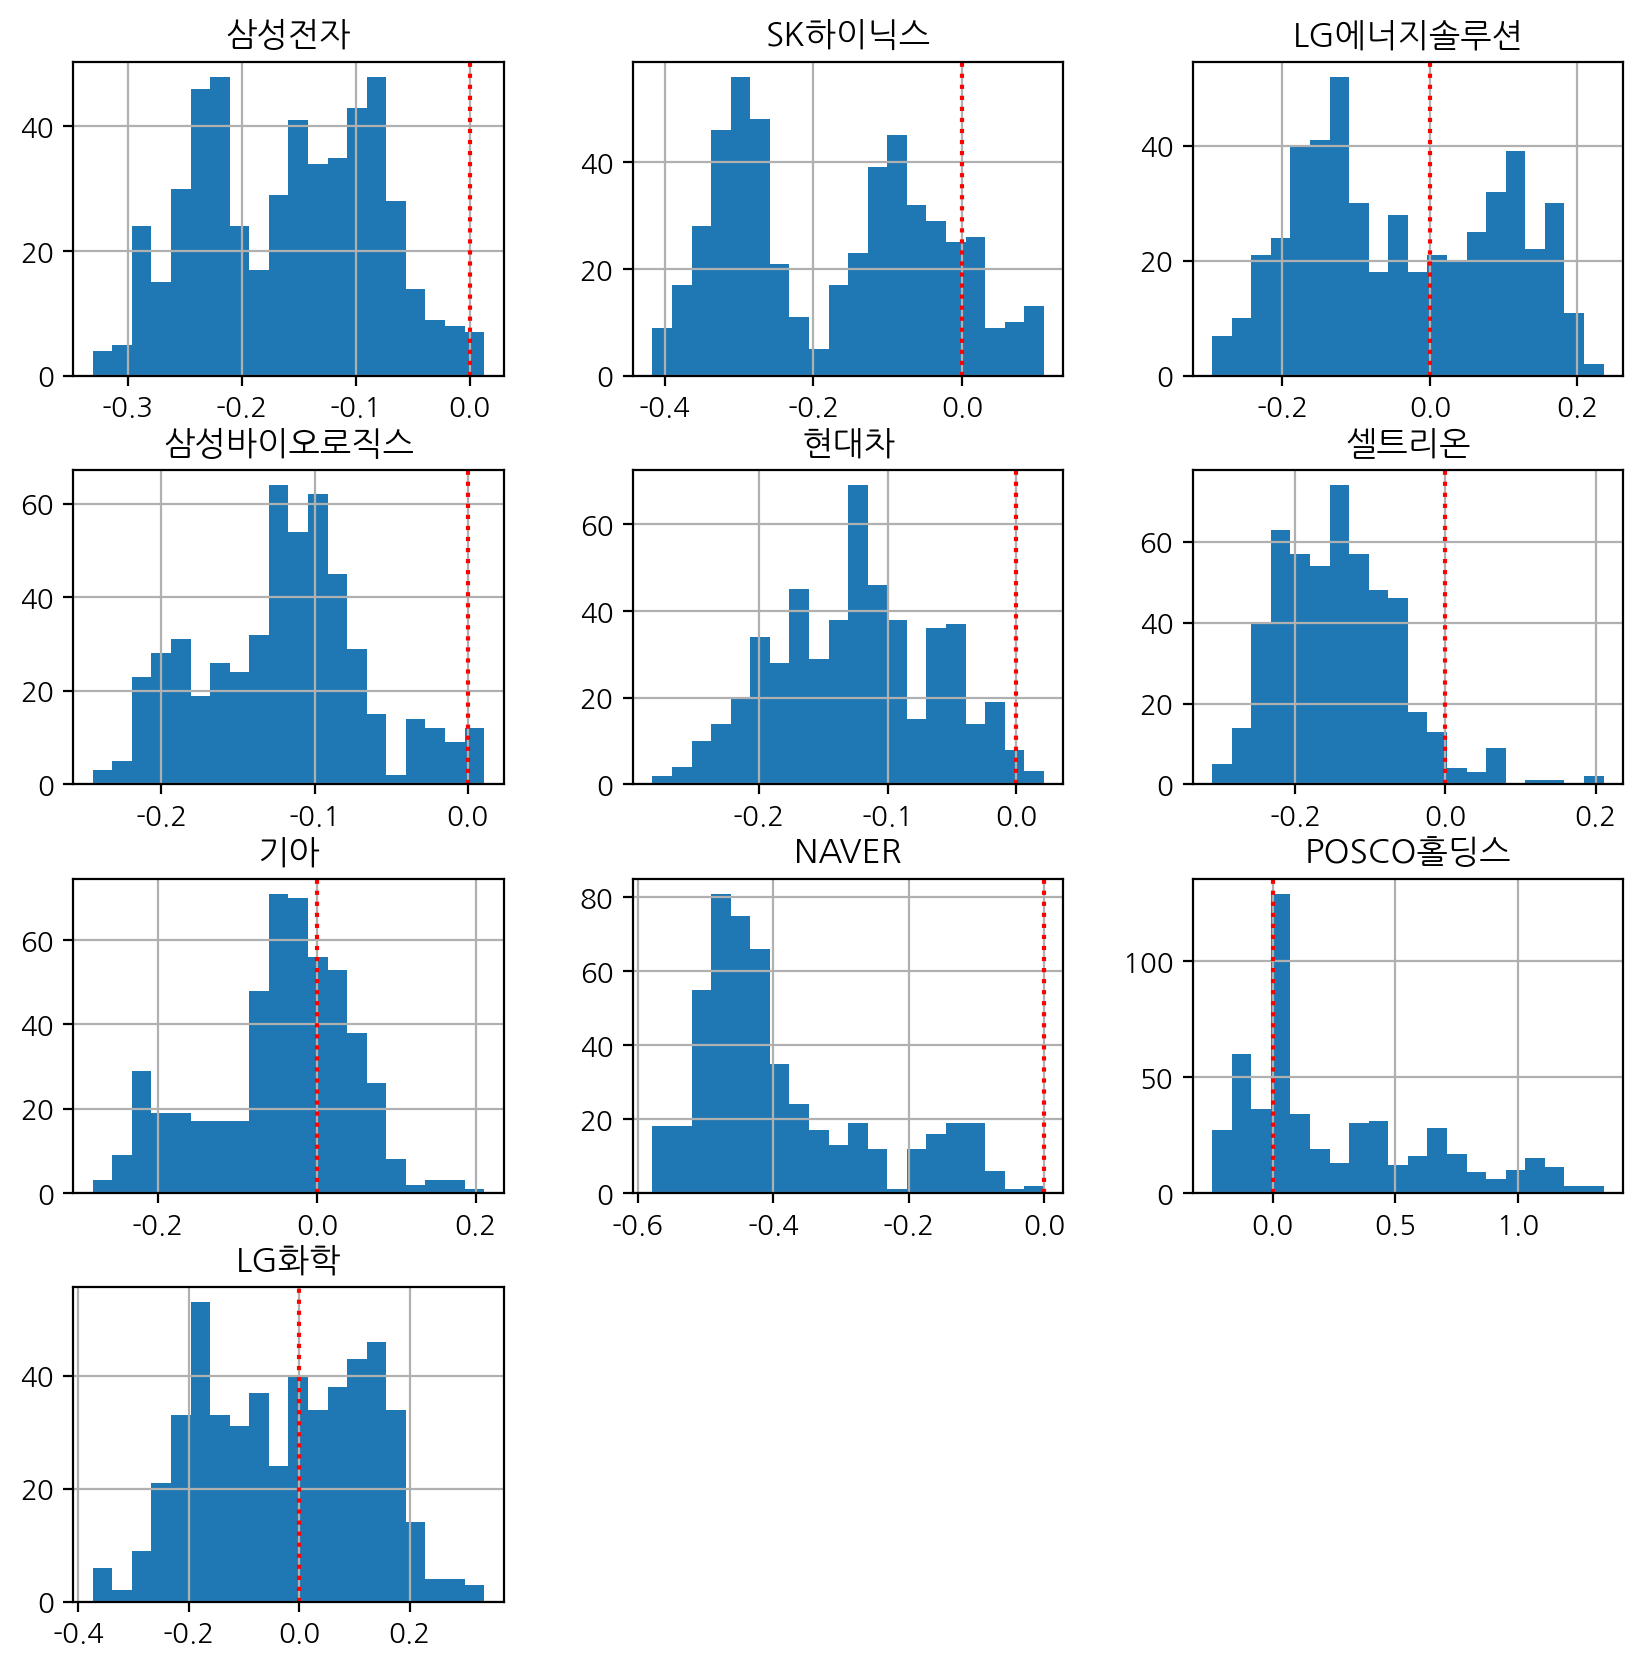

In [97]:
# 수익률에 대한 히스토그램 그리기
axes = df_norm.hist(bins=20, figsize=(10,10))  #세미콜론(;)은 계산한 로그를 없애준다

# 0 값에 선 표시하기
for ax in axes.flat:
  ax.axvline(0, c="r", ls=":")

plt.show()

<Axes: ylabel='Density'>

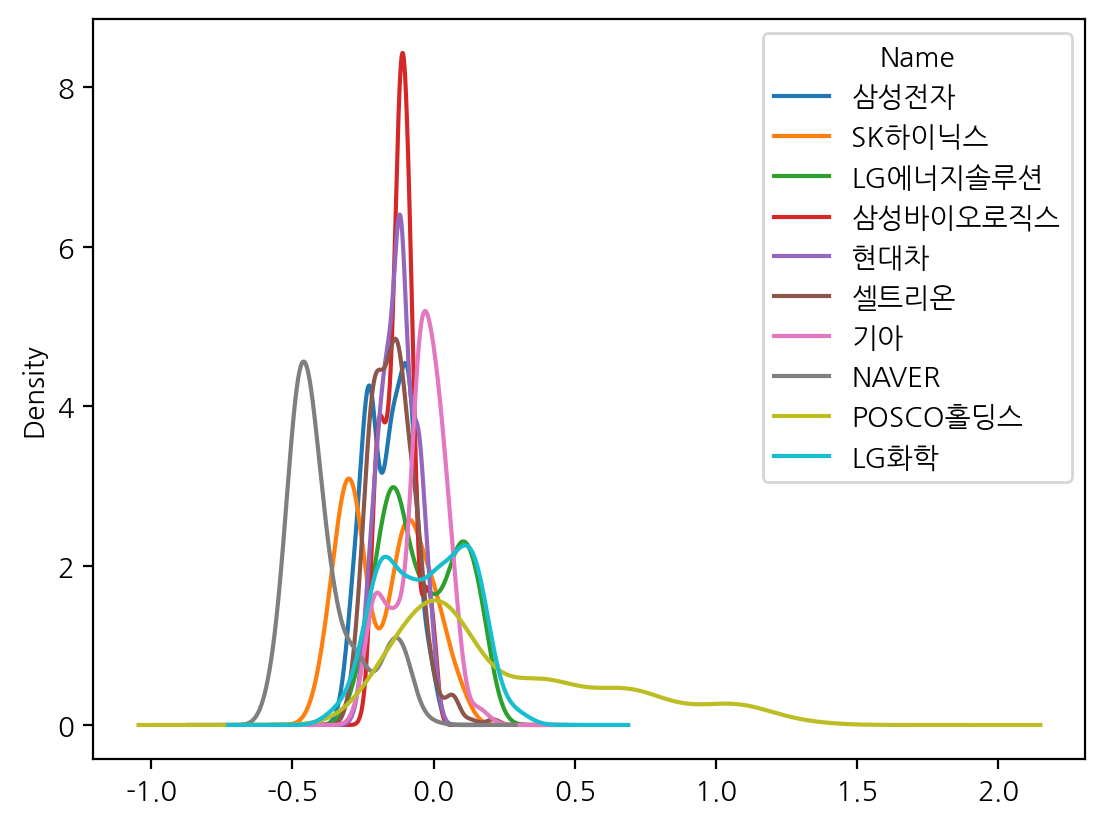

In [95]:
df_norm.plot(kind='kde')

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다.
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다.
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다.
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [98]:
# skew 로 수익률의 왜도를 구합니다.
df_norm.skew()

Name
삼성전자       -0.019992
SK하이닉스      0.146401
LG에너지솔루션    0.136124
삼성바이오로직스    0.093234
현대차         0.006674
셀트리온        0.813224
기아         -0.449200
NAVER       1.048855
POSCO홀딩스    0.922739
LG화학       -0.054330
dtype: float64

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다.
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다.
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며,
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)



* [scipy.stats.kurtosis — SciPy Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)
* Fisher의 정의를 사용하면 결과에서 3.0을 빼서 정규 분포에 대해 0.0이 됩니다.
* True 이면 피셔의 정의가 사용됩니다(정상 ==> 0.0). False이면 Pearson의 정의가 사용됩니다(정상 ==> 3.0)

In [99]:
# kurt 로 첨도를 구합니다.
df_norm.kurt()

Name
삼성전자       -0.958461
SK하이닉스     -1.234813
LG에너지솔루션   -1.234512
삼성바이오로직스   -0.292627
현대차        -0.629232
셀트리온        1.447542
기아         -0.139130
NAVER       0.083287
POSCO홀딩스   -0.198411
LG화학       -0.955737
dtype: float64

## 상자수염그림
<img src="https://miro.medium.com/max/1400/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="400">

* 이미지 출처 : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [100]:
df_norm.kurt().describe()

count    10.000000
mean     -0.411209
std       0.805021
min      -1.234813
25%      -0.957780
50%      -0.460929
75%      -0.153951
max       1.447542
dtype: float64

<Axes: >

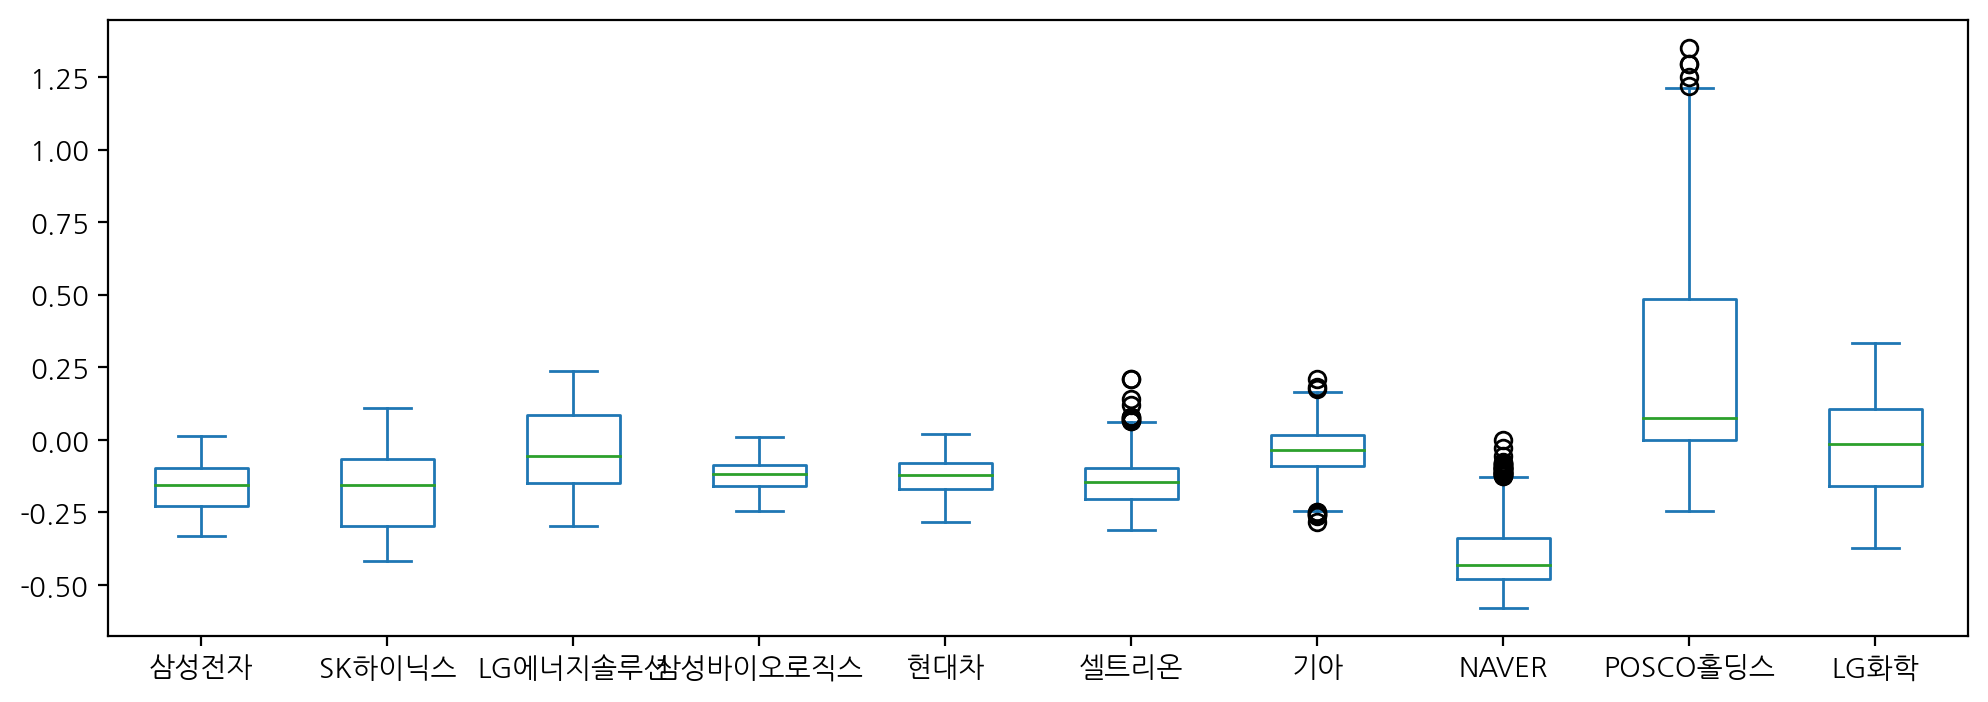

In [124]:
df_norm.plot(kind='box', figsize=(12,4))

<Axes: xlabel='Name'>

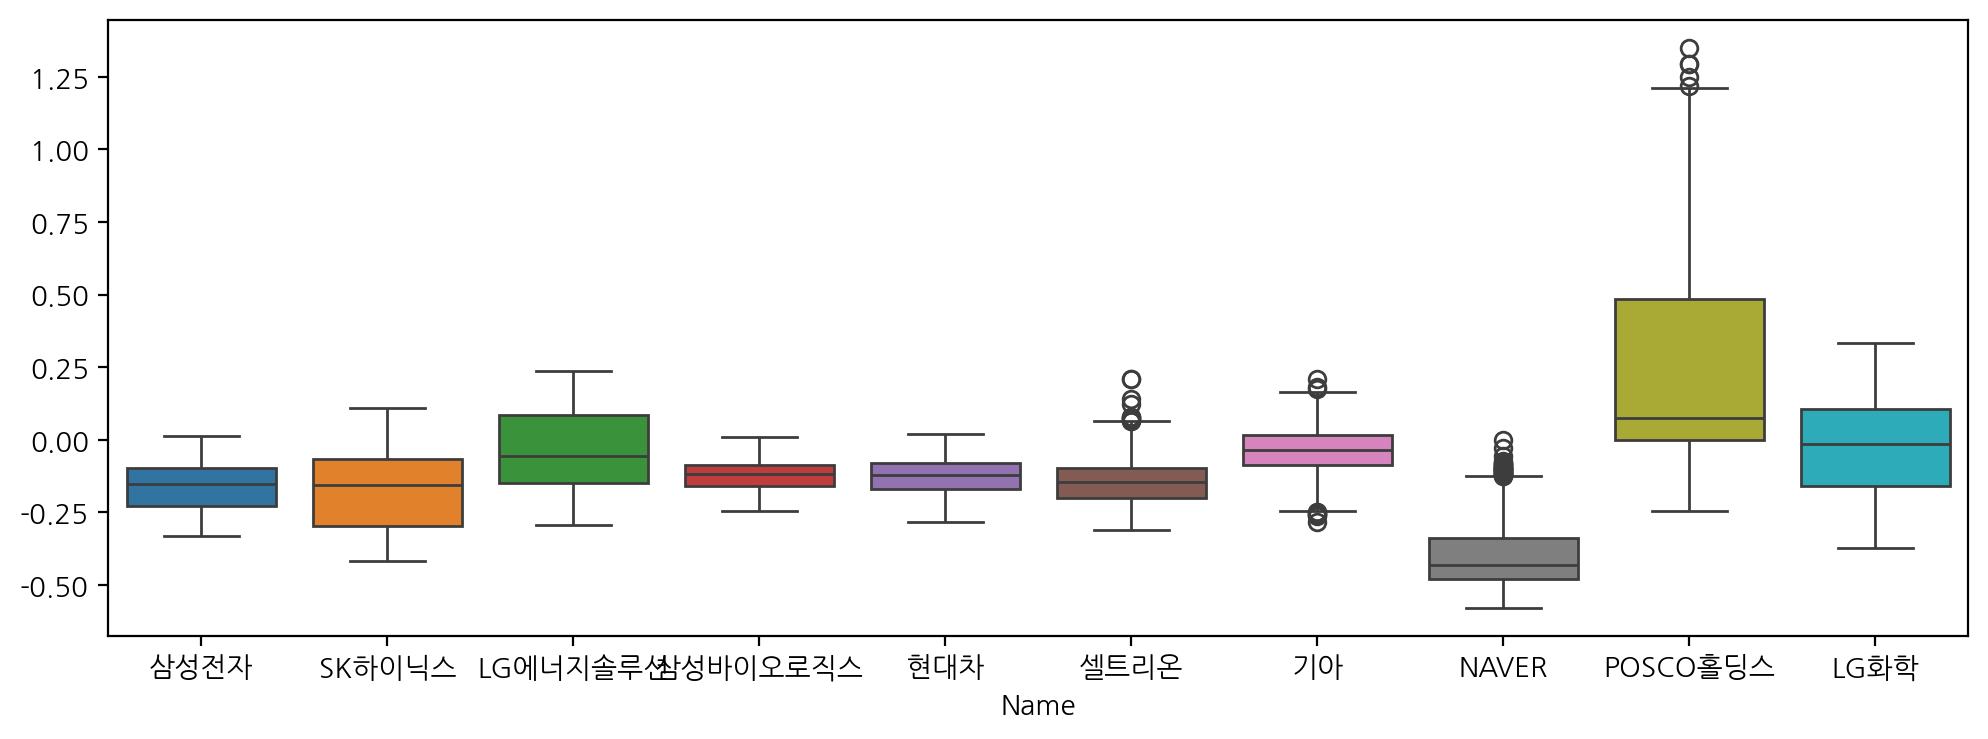

In [109]:
plt.figure(figsize=(12,4))
sns.boxplot(df_norm)


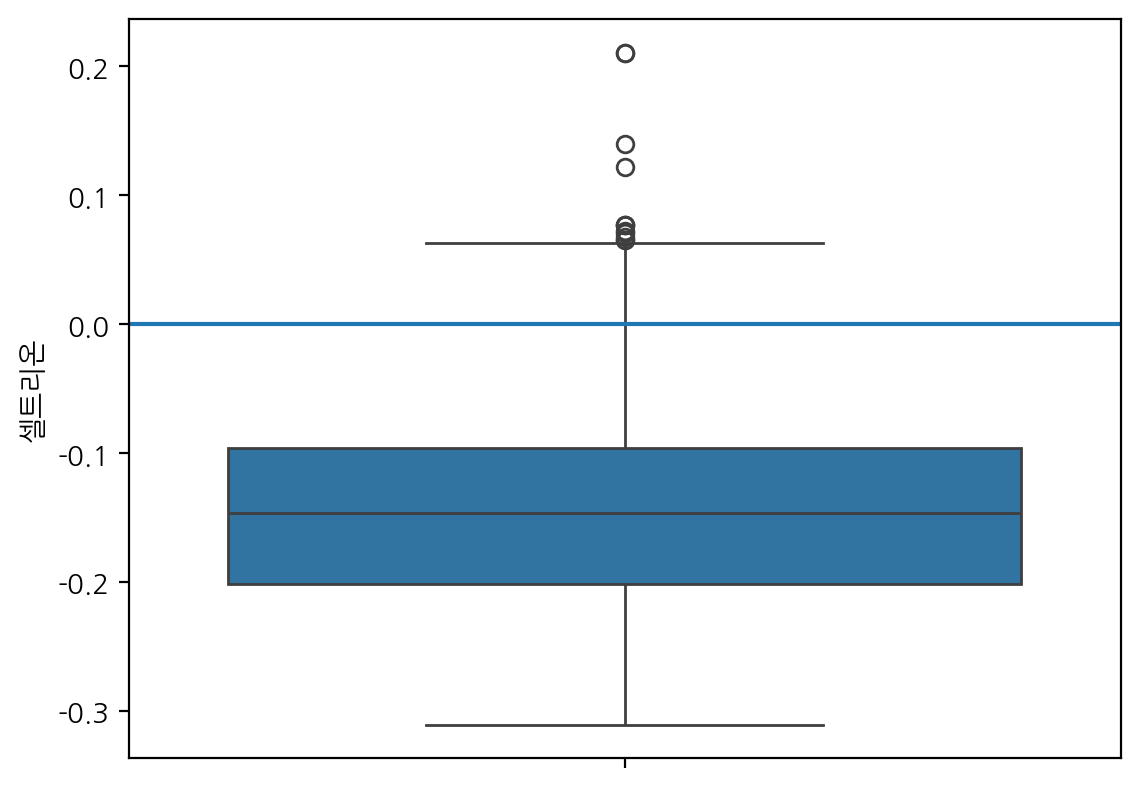

In [123]:
Q1, Q3 = np.quantile(df_norm['셀트리온'], [0.25, 0.75] )
IQR = Q3 - Q1
IQR

ax = sns.boxplot(df_norm['셀트리온'])
ax.axhline(0)

## kde
* [커널 밀도 추정 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%BB%A4%EB%84%90_%EB%B0%80%EB%8F%84_%EC%B6%94%EC%A0%95)

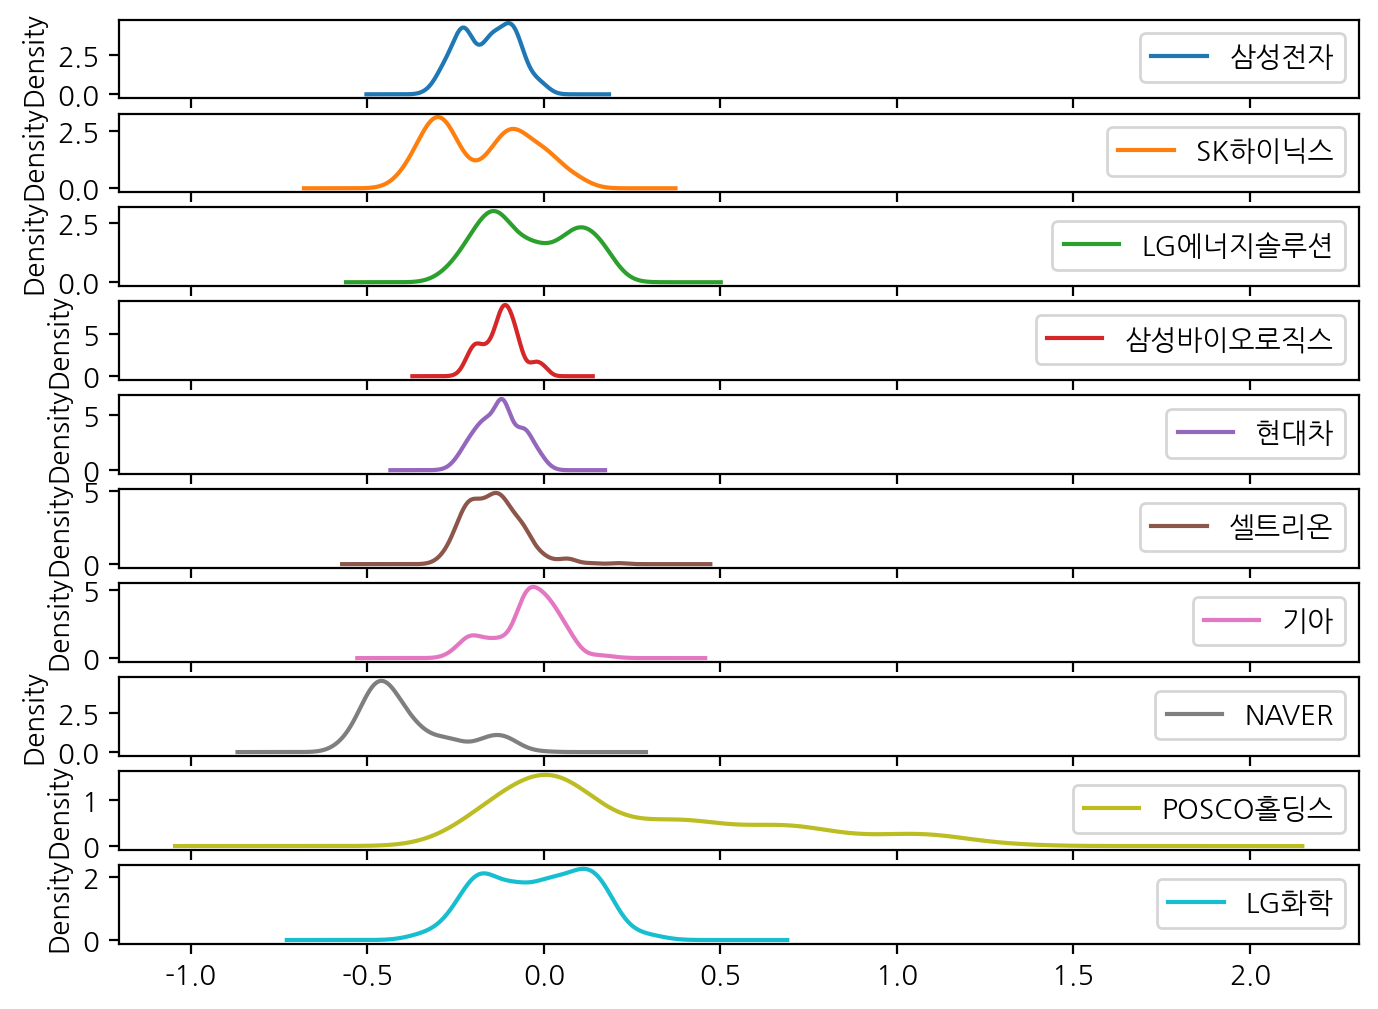

In [126]:
df_norm.plot(kind='kde', subplots=True, figsize=(8,6));

## 중심극한의 정리
* 중심 극한 정리는 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리이다.
* 수학자 피에르시몽 라플라스는 1774년에서 1786년 사이의 일련의 논문에서 이러한 정리의 발견과 증명을 시도하였다. 확률과 통계학에서 큰 의미가 있으며 실용적인 면에서도 품질관리, 식스 시그마에서 많이 이용된다.
* https://ko.wikipedia.org/wiki/중심_극한_정리

* 중심극한정리는 독립적이고 동일한 확률 분포를 가진 무작위 표본들의 평균이, 표본의 크기가 충분히 커지면 정규 분포에 가까워진다는 이론입니다. 즉, 여러 번의 실험 또는 관측을 통해 얻은 평균들의 분포가 정규 분포 형태를 띠게 됩니다.
* 예를 들어, 실제 주식 시장 데이터 분석에서 장기간에 걸친 주식 수익률의 평균을 분석할 때 이 원리가 활용될 수 있습니다.

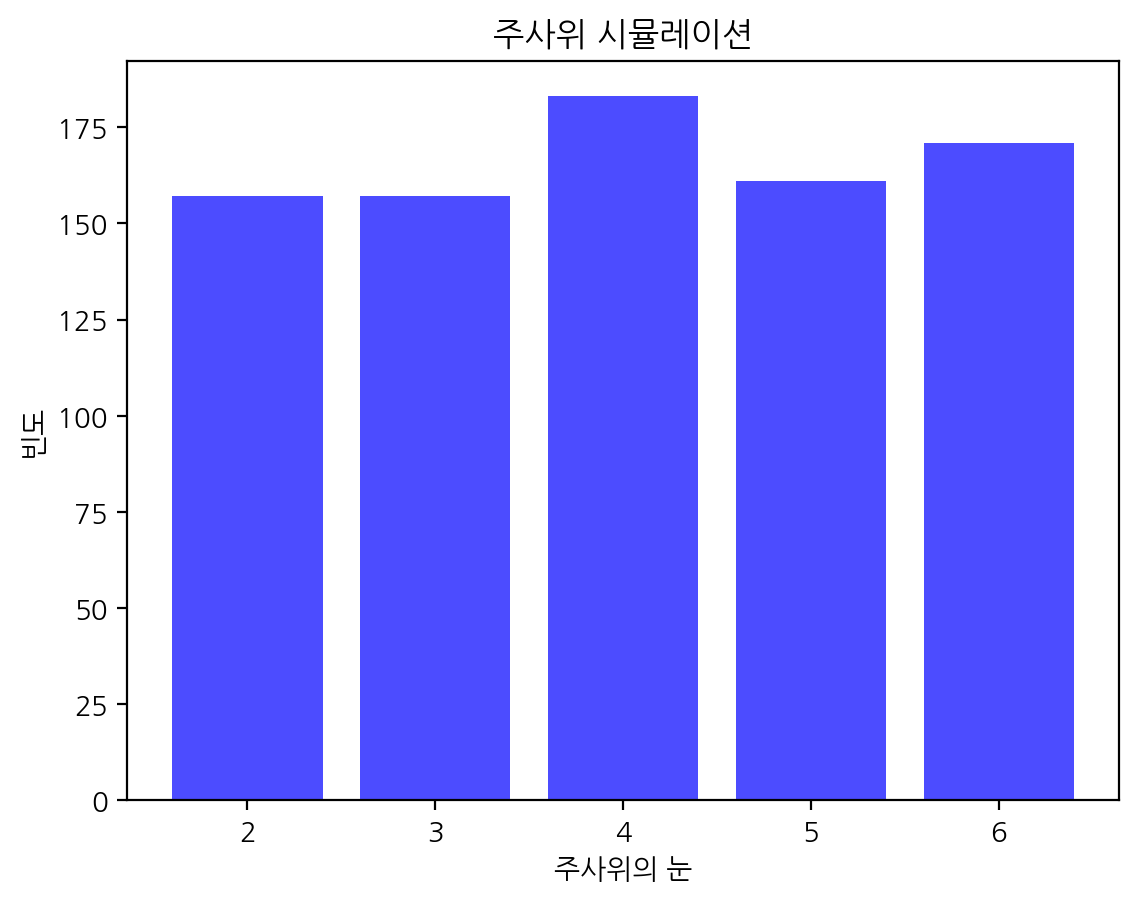

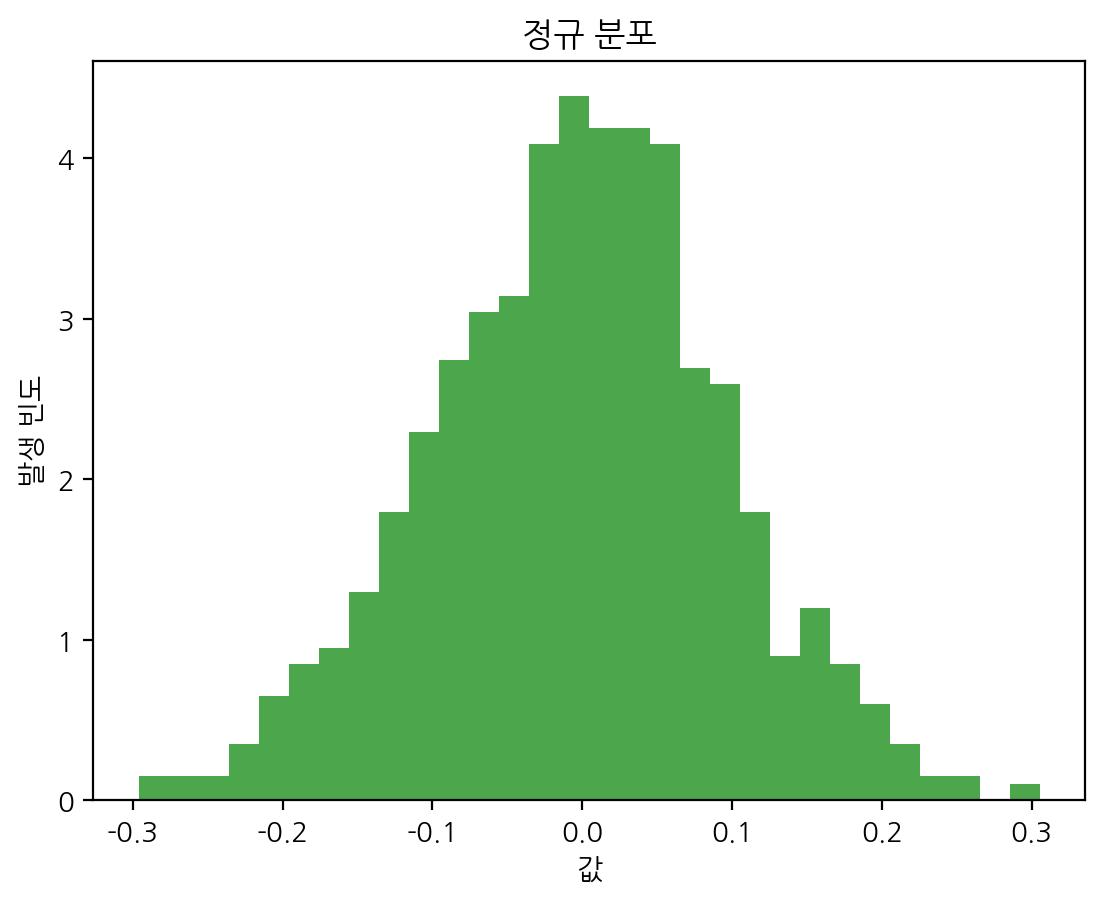

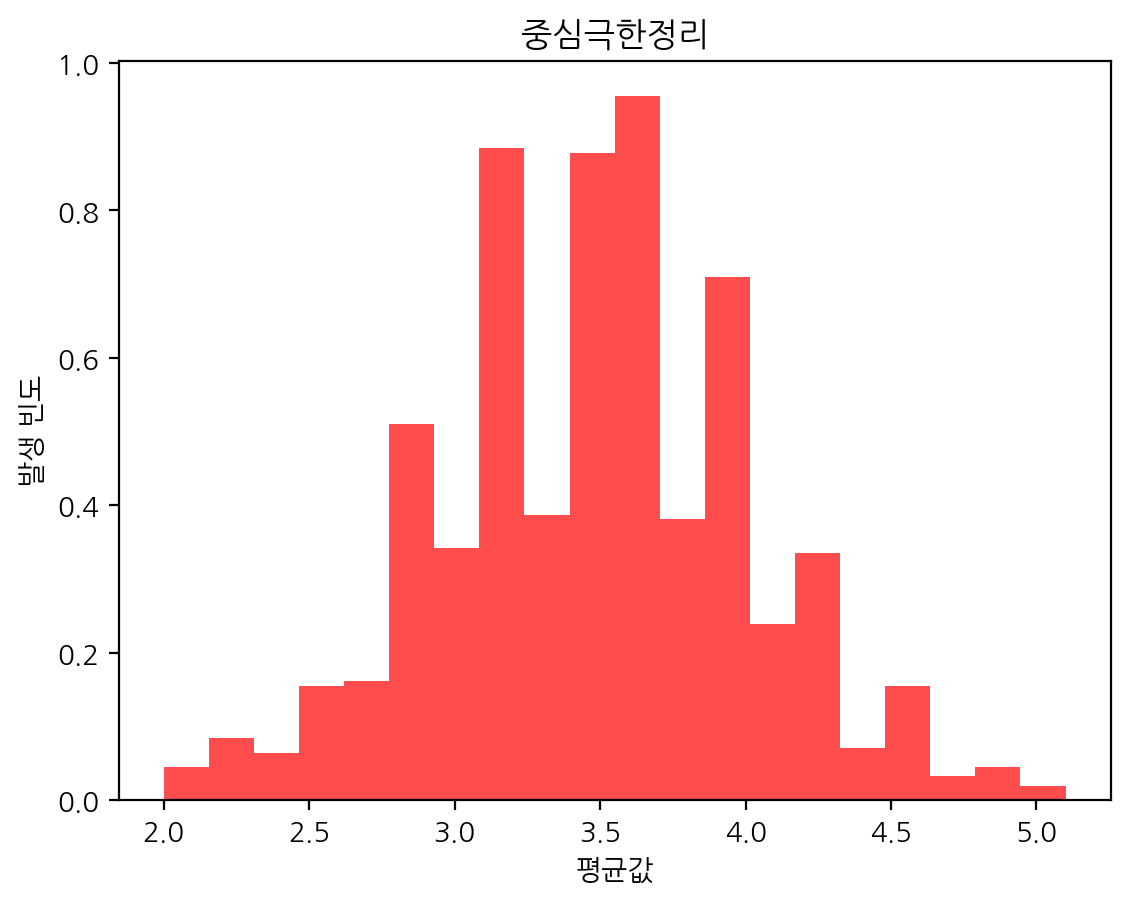

In [127]:
# 주사위 시뮬레이션
np.random.seed(0)  # 결과의 일관성을 위해 시드 설정
rolls = np.random.randint(1, 7, size=1000)  # 1부터 6까지 숫자 중 무작위로 1000개 선택
plt.hist(rolls, bins=np.arange(1.5, 7.5, 1), rwidth=0.8, color='blue', alpha=0.7)
plt.title("주사위 시뮬레이션")
plt.xlabel("주사위의 눈")
plt.ylabel("빈도")
plt.xticks(range(2, 7))
plt.show()

# 정규 분포 시뮬레이션
mu, sigma = 0, 0.1  # 평균과 표준편차
s = np.random.normal(mu, sigma, 1000)  # 정규분포에 따른 난수 생성

# 정규 분포 시각화
plt.hist(s, bins=30, density=True, alpha=0.7, color='green')
plt.title("정규 분포")
plt.xlabel("값")
plt.ylabel("발생 빈도")
plt.show()

# 중심극한정리 시뮬레이션
means = [np.mean(np.random.randint(1, 7, size=10)) for _ in range(1000)]  # 주사위를 10번씩 던져 평균을 구함

# 중심극한정리 시각화
plt.hist(means, bins=20, density=True, color='red', alpha=0.7)
plt.title("중심극한정리")
plt.xlabel("평균값")
plt.ylabel("발생 빈도")
plt.show()


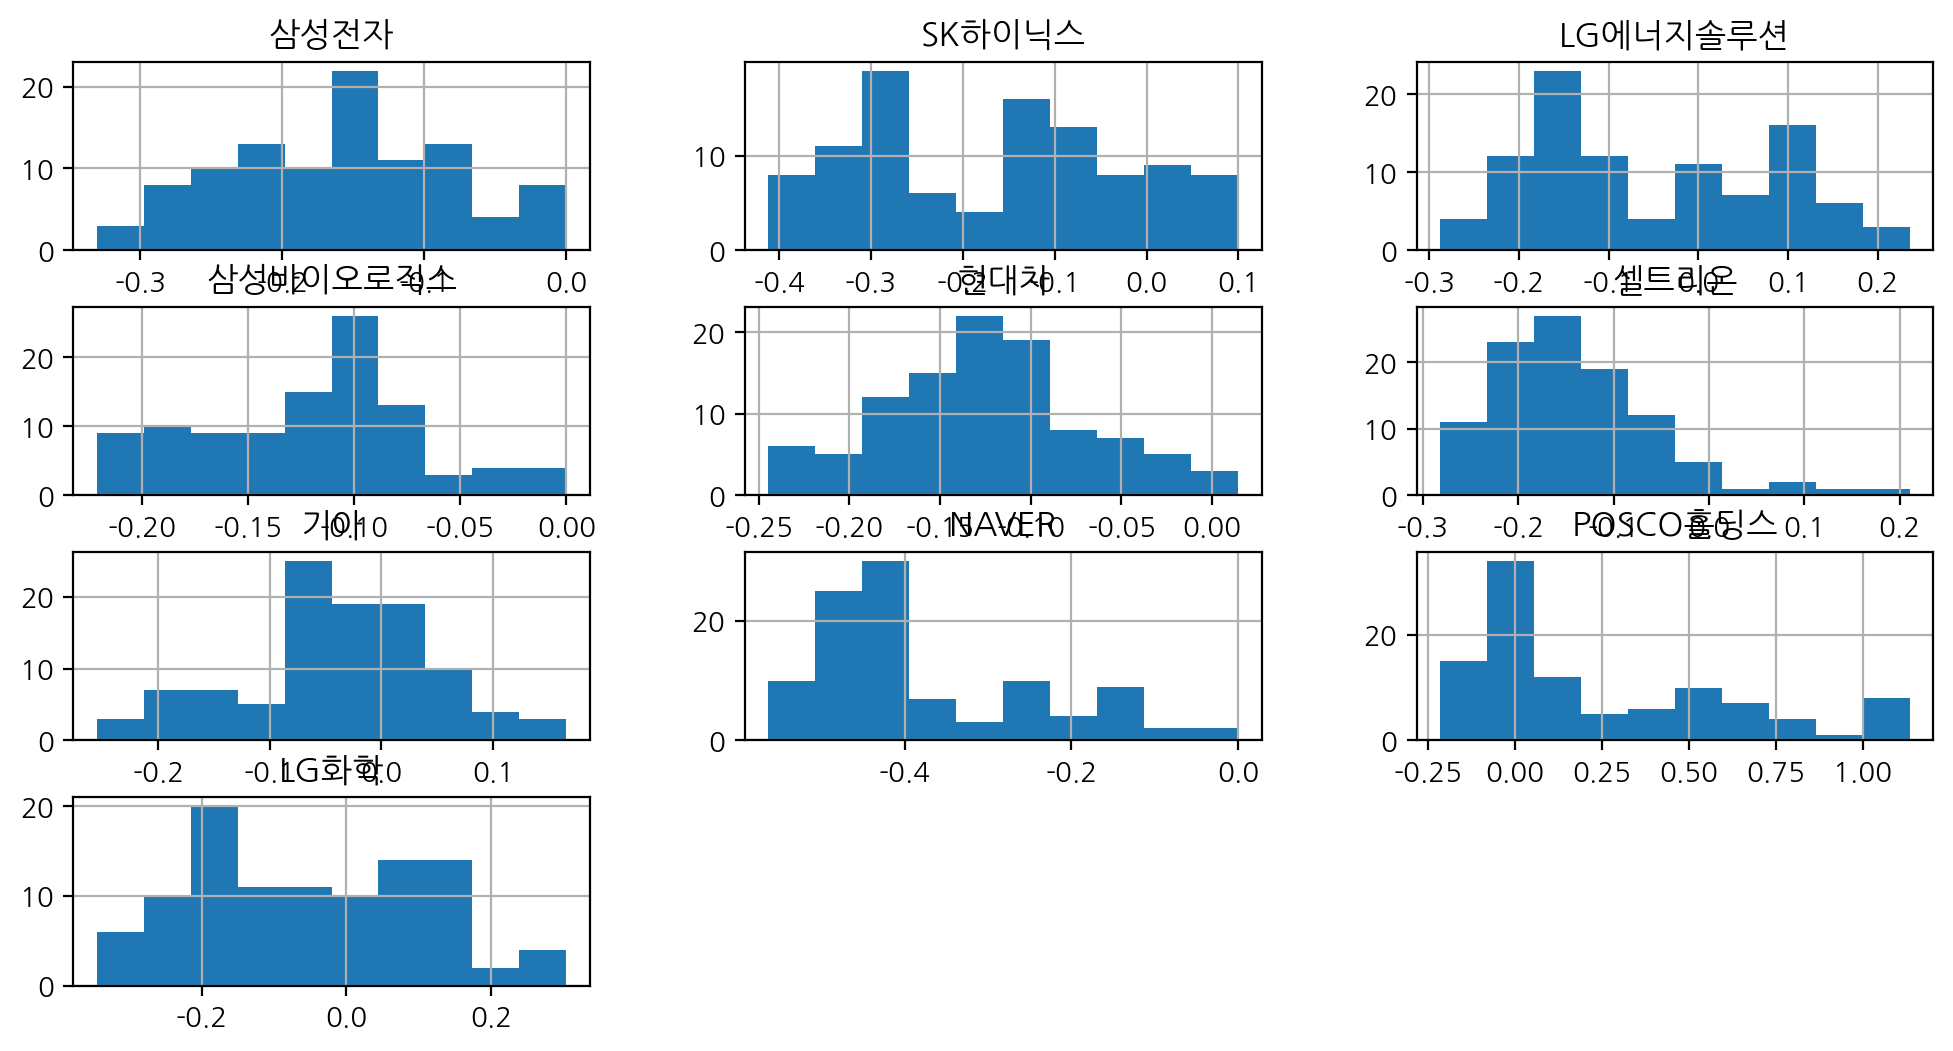

In [134]:
df_norm.sample(frac=0.2, random_state=42).hist(figsize=(12,6));

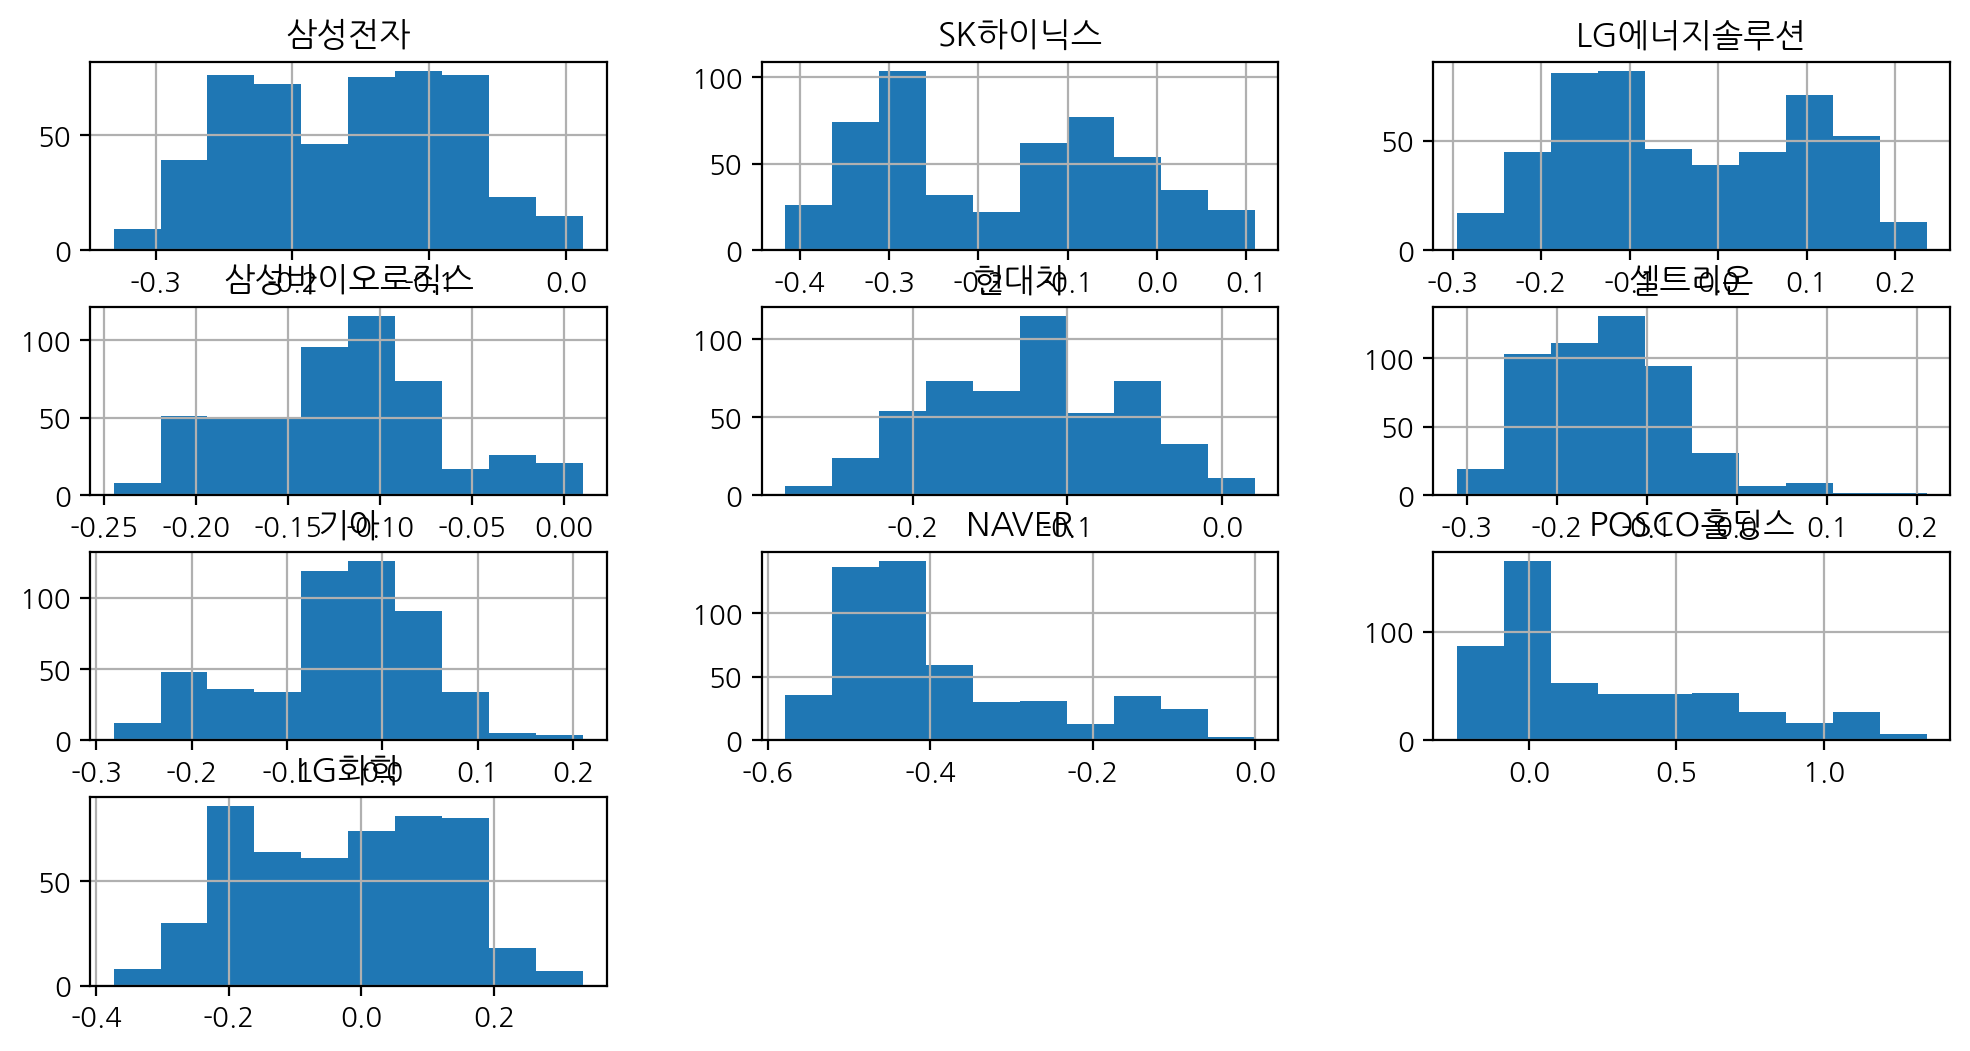

In [130]:
df_norm.hist(figsize=(12,6));

In [139]:
# 중심극한정리를 시연하기 위해, 여러 번에 걸쳐서 표본 평균을 계산합니다.
sample_means = []
n_samples = 1000  # 표본 추출 횟수
sample_size = 50   # 각 표본의 크기

for _ in range(n_samples):
  sample = df_norm['NAVER'].sample(n = sample_size)
  sample_means.append(np.mean(sample))


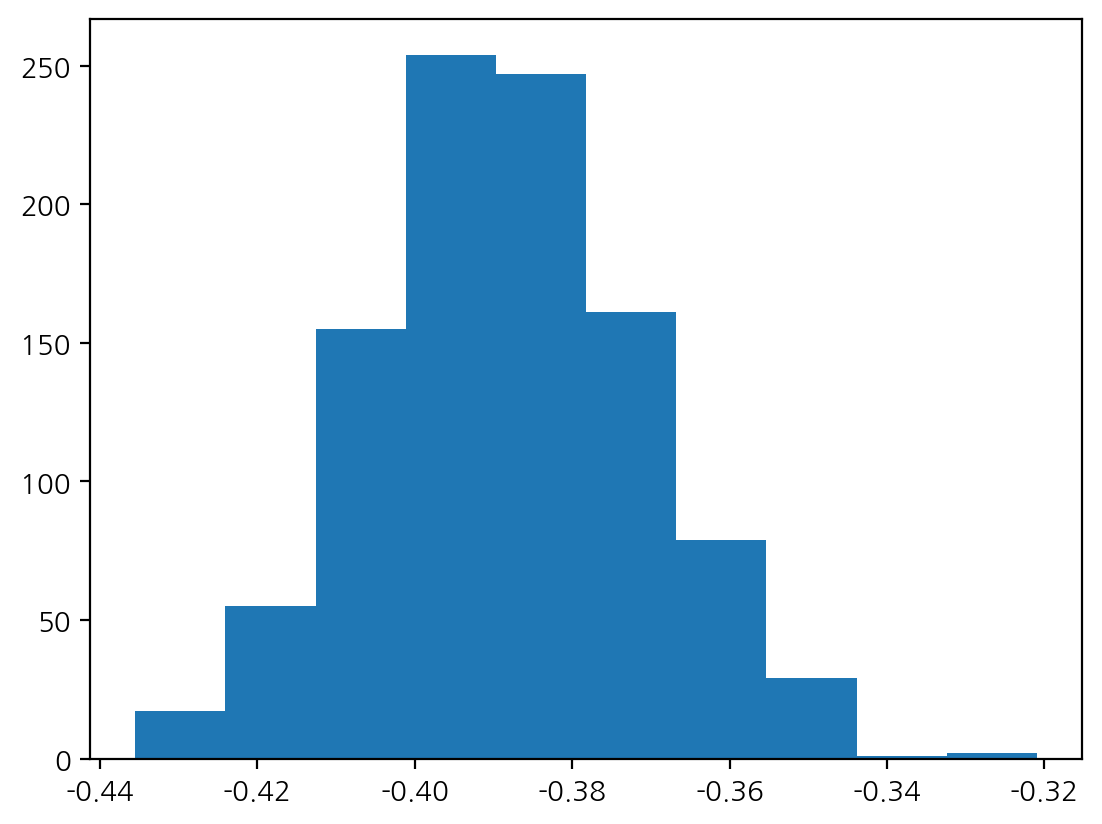

In [140]:
plt.hist(sample_means);